                age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+

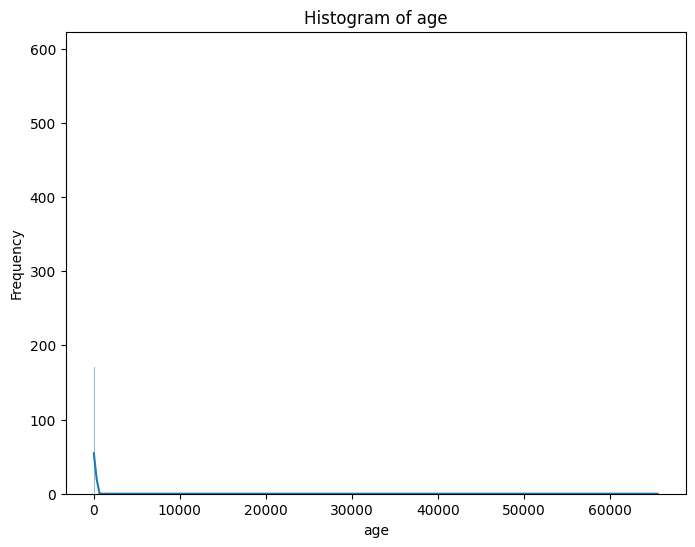

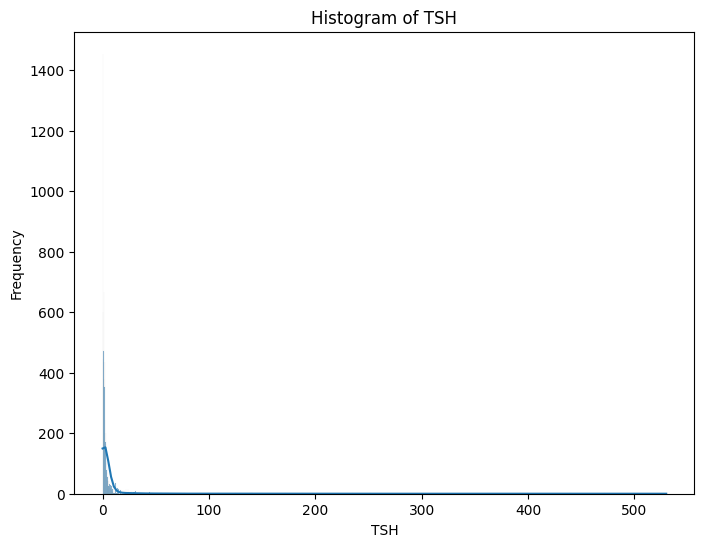

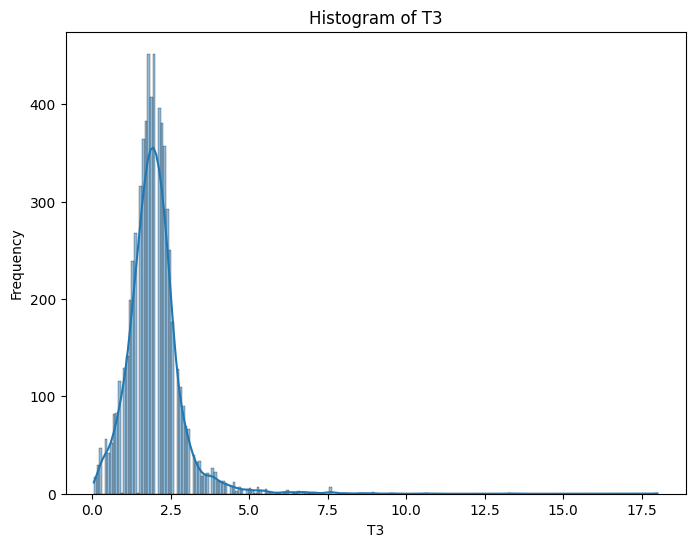

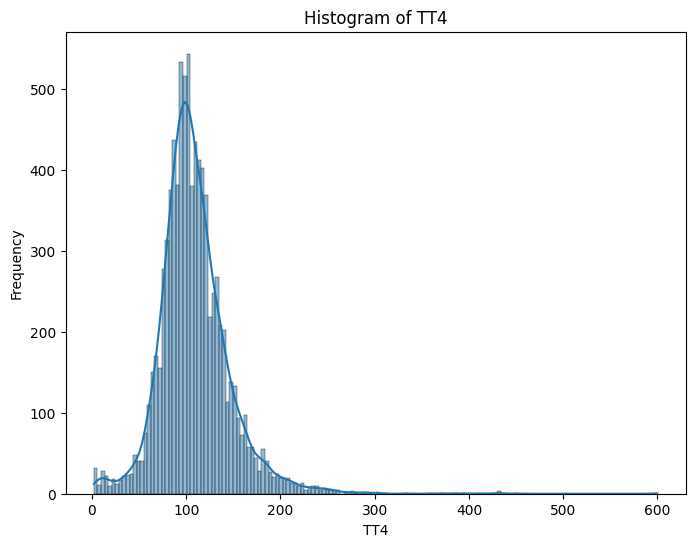

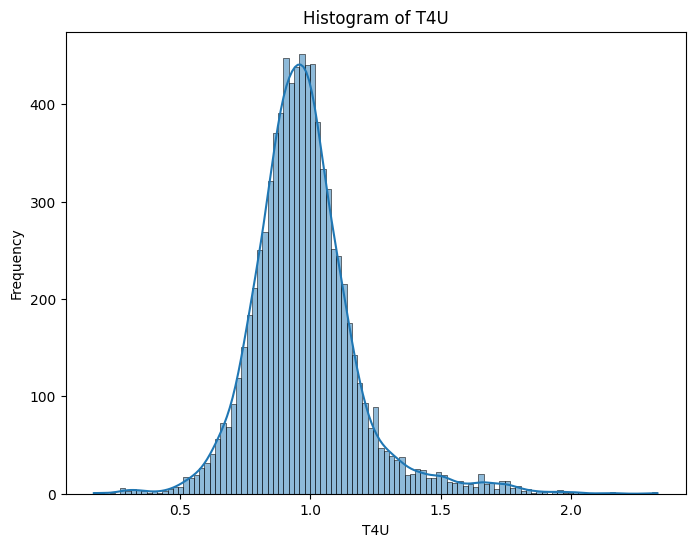

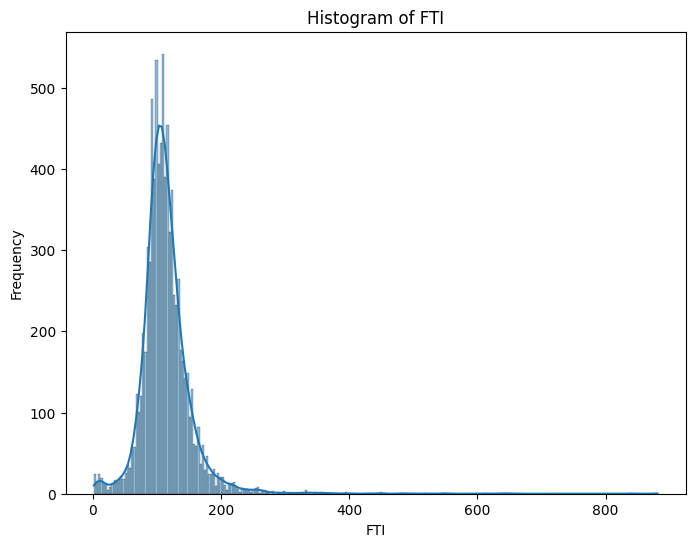

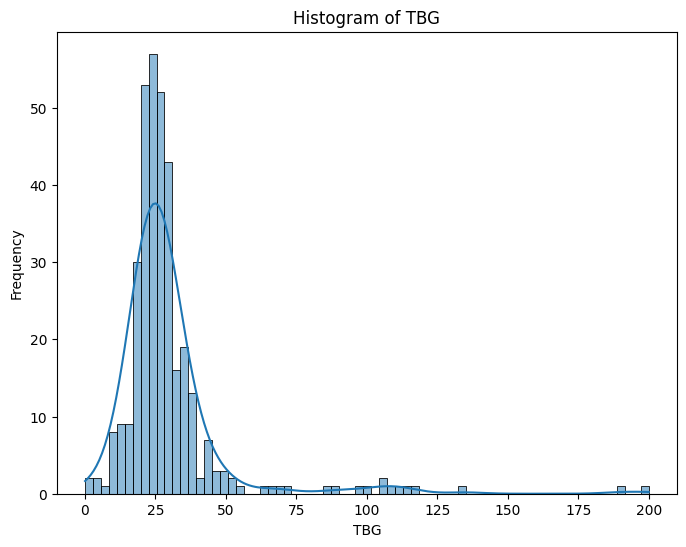

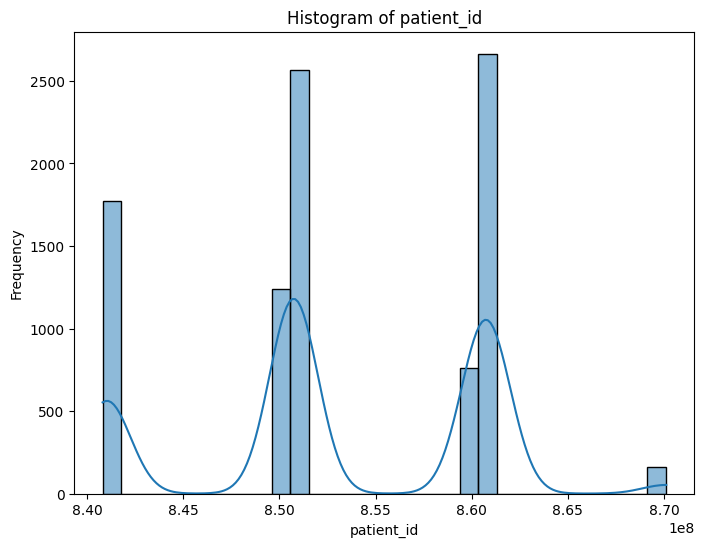

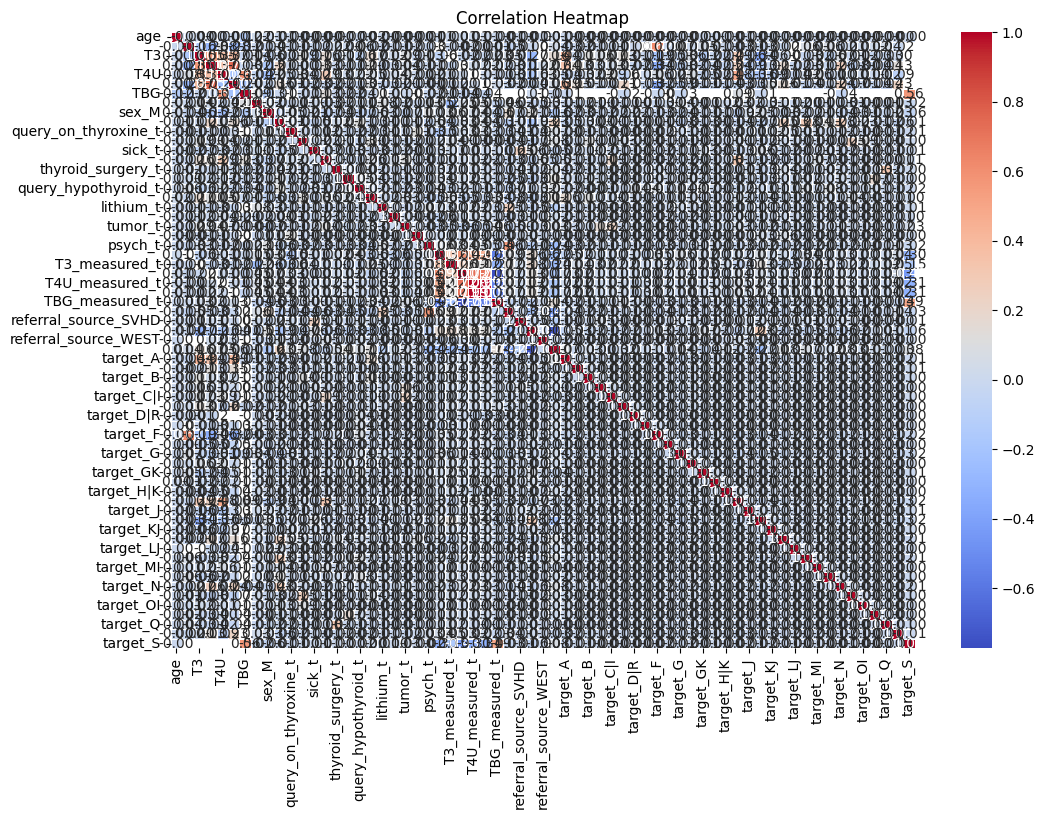

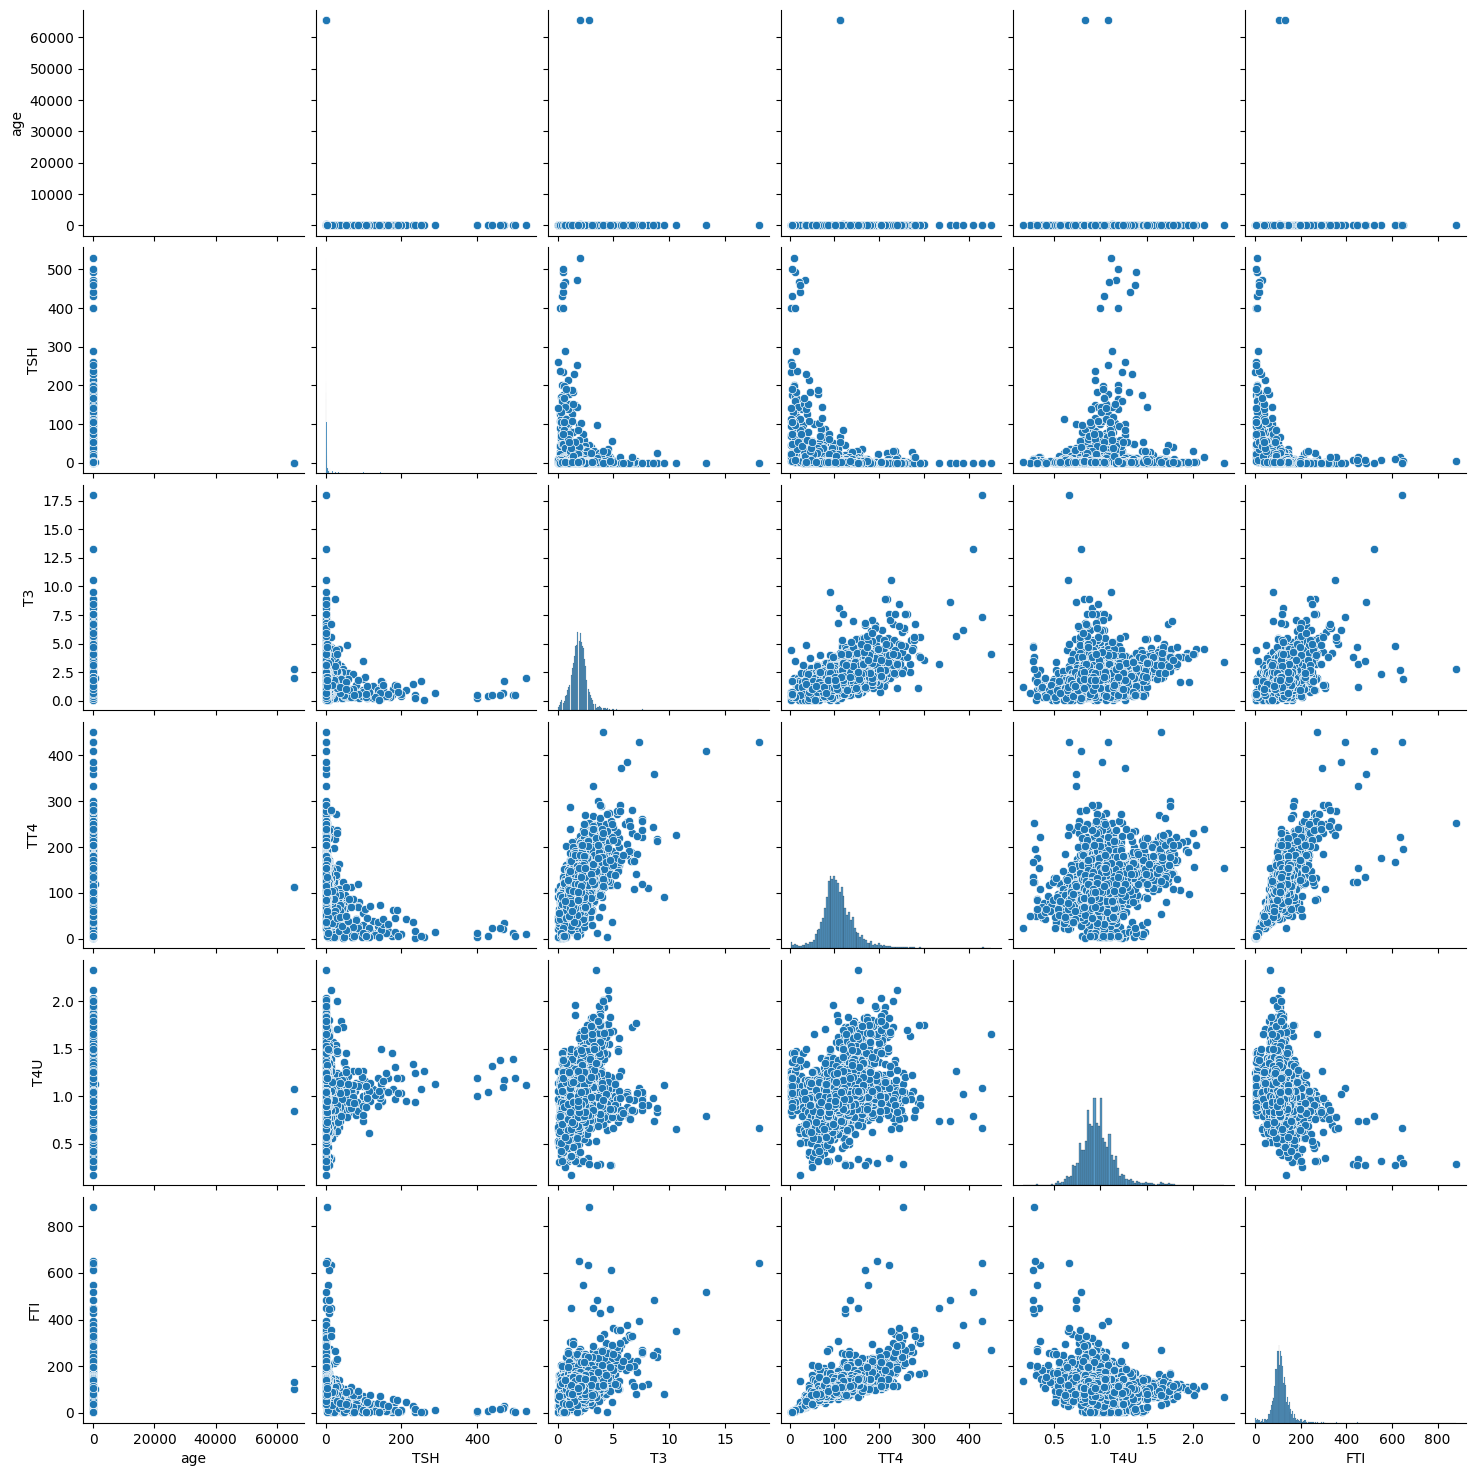

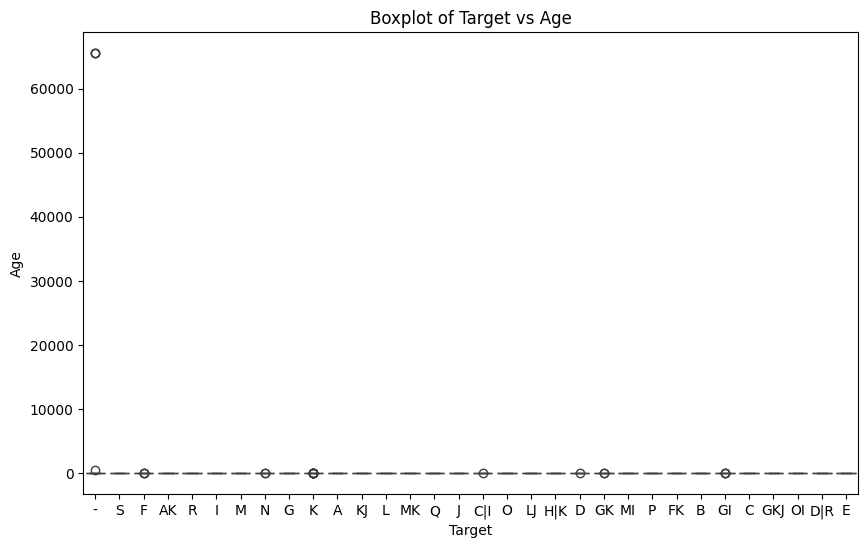

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('thyroidDF.csv')
print(df.describe())
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

# Histograms for numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

selected_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
sns.pairplot(df_encoded[selected_cols].dropna())
plt.show()

# Relationship between categorical and numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Boxplot of Target vs Age')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()


In [ ]:
correlation_matrix = df_encoded.corr()
thyroid_correlations = correlation_matrix[['TSH', 'T3', 'TT4', 'T4U', 'FTI']]
thyroid_correlations_abs = thyroid_correlations.abs().sort_values(by=['TSH', 'T3', 'TT4', 'T4U', 'FTI'], ascending=False)
print(thyroid_correlations_abs)
